<a href="https://colab.research.google.com/github/CompoundEmotion-Recognition/SCNN_Hybrid_model/blob/main/SCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORTING LIBRARIES

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import callbacks,optimizers

In [ ]:
cv2.imread("/content/drive/MyDrive/dataset/train/10/test_146_aligned.jpg")

DEFINING THE TRAIN AND TEST

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/dataset/train',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='categorical')

validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/dataset/test',
                                          target_size=(200,200),
                                          batch_size=3,
                                          class_mode='categorical')

Found 3164 images belonging to 11 classes.
Found 725 images belonging to 11 classes.


In [ ]:
train_dataset.class_indices

{'1': 0,
 '10': 1,
 '11': 2,
 '2': 3,
 '3': 4,
 '4': 5,
 '5': 6,
 '6': 7,
 '7': 8,
 '8': 9,
 '9': 10}

In [ ]:
train_dataset.classes

array([ 0,  0,  0, ..., 10, 10, 10], dtype=int32)

S-CNN MODEL DEFINITION

In [ ]:


model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation  ='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPool2D(2,2),
                                    #
                                     tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(11,activation='softmax')
                                    ])

MODEL SUMMARY

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 99, 99, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 64)       

DEFINING CONFUSION MATRIX

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict_generator(train_dataset )
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(train_dataset.classes, y_pred))
print('Classification Report')
target_names = ['0', '1','2','3','4','5','6','7','8','9','10']
print(classification_report(train_dataset.classes, y_pred, target_names=target_names))

<ipython-input-10-e043f80537cf>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(train_dataset )


Confusion Matrix
[[552   0   0   0   0   0   0   0   0   0   0]
 [668   0   0   0   0   0   0   0   0   0   0]
 [114   0   0   0   0   0   0   0   0   0   0]
 [217   0   0   0   0   0   0   0   0   0   0]
 [106   0   0   0   0   0   0   0   0   0   0]
 [137   0   0   0   0   0   0   0   0   0   0]
 [ 69   0   0   0   0   0   0   0   0   0   0]
 [606   0   0   0   0   0   0   0   0   0   0]
 [117   0   0   0   0   0   0   0   0   0   0]
 [440   0   0   0   0   0   0   0   0   0   0]
 [138   0   0   0   0   0   0   0   0   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.17      1.00      0.30       552
           1       0.00      0.00      0.00       668
           2       0.00      0.00      0.00       114
           3       0.00      0.00      0.00       217
           4       0.00      0.00      0.00       106
           5       0.00      0.00      0.00       137
           6       0.00      0.00      0.00        69
          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


METRICS VALUE DEFINITION

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
import keras.backend as K

def f1_score(y_true, y_pred):
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))

        recall = TP / (Positives+K.epsilon())
        return recall


    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

        precision = TP / (Pred_Positives+K.epsilon())
        return precision

    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(loss= 'categorical_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics=['Precision','accuracy','Recall','AUC',f1_score])

MODEL TRAINING FOR 20 EPOCH

In [ ]:
model_fit = model.fit(train_dataset,
                      validation_data = validation_dataset,
                      epochs=20)



Epoch 1/20
1055/1055 [==============================] - 935s 886ms/step - loss: 2.0339 - precision: 0.4453 - accuracy: 0.2987 - recall: 0.0373 - auc: 0.7663 - f1_score: 0.0521 - val_loss: 1.8411 - val_precision: 0.5875 - val_accuracy: 0.4014 - val_recall: 0.0648 - val_auc: 0.8094 - val_f1_score: 0.0930
Epoch 2/20
1055/1055 [==============================] - 601s 570ms/step - loss: 1.6714 - precision: 0.5974 - accuracy: 0.4497 - recall: 0.2016 - auc: 0.8501 - f1_score: 0.2605 - val_loss: 1.8127 - val_precision: 0.5842 - val_accuracy: 0.4497 - val_recall: 0.2248 - val_auc: 0.8235 - val_f1_score: 0.2842
Epoch 3/20
1055/1055 [==============================] - 596s 565ms/step - loss: 1.4086 - precision: 0.6924 - accuracy: 0.5281 - recall: 0.3606 - auc: 0.8958 - f1_score: 0.4341 - val_loss: 1.8545 - val_precision: 0.5522 - val_accuracy: 0.4607 - val_recall: 0.3572 - val_auc: 0.8509 - val_f1_score: 0.4102
Epoch 4/20
1055/1055 [==============================] - 606s 574ms/step - loss: 1.1013 -

In [ ]:
model.save('mymodel.h5')

METRIC VALUE PLOT

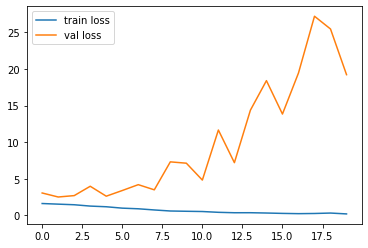

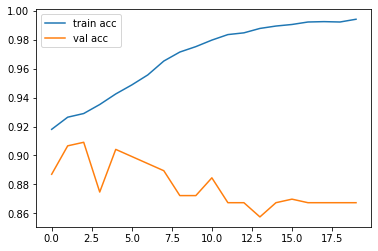

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(model_fit.history['loss'], label='train loss')
plt.plot(model_fit.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model_fit.history['accuracy'], label='train acc')
plt.plot(model_fit.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

#plot the precision
plt.plot(model_fit.history['Precision'], label='train prec')
plt.plot(model_fit.history['val_precision'], label='val prec')
plt.legend()
plt.show()
plt.savefig('AccVal_prec')

#plot recall
plt.plot(model_fit.history['Recall'], label='train recall')
plt.plot(model_fit.history['val_Recall'], label='val recall')
plt.legend()
plt.show()
plt.savefig('AccVal_rec')

#plot f1_score
plt.plot(model_fit.history['f1_score'], label='train f1')
plt.plot(model_fit.history['val_f1_score'], label='val f1')
plt.legend()
plt.show()
plt.savefig('AccVal_f1')

val [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
11


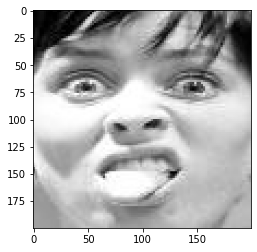

In [ ]:
img=image.load_img('/content/drive/MyDrive/dataset/test/11/test_670_aligned.jpg',target_size=(200,200))
plt.imshow(img)
X=image.img_to_array(img)
X=np.expand_dims(X,axis=0)
images=np.vstack([X])
val=model.predict(images)
print("val %s"%val)
rach=val.argmax()
if rach==0:
  print("1")
if rach==1:
  print("10")
if rach==2:
  print("11")
if rach==3:
  print("2")
if rach==4:
  print("3")
if rach==5:
  print("4")
if rach==6:
  print("5")
if rach==7:
  print("6")
if rach==8:
  print("7")
if rach==9:
  print("8")
if rach==10:
  print("9")



In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
img=image.load_img('photo.jpg',target_size=(200,200))
plt.imshow(img)
X=image.img_to_array(img)
X=np.expand_dims(X,axis=0)
images=np.vstack([X])
val=model.predict(images)

rach=val.argmax()
if rach==0:
  print("1")
if rach==1:
  print("10")
if rach==2:
  print("11")
if rach==3:
  print("2")
if rach==4:
  print("3")
if rach==5:
  print("4")
if rach==6:
  print("5")
if rach==7:
  print("6")
if rach==8:
  print("7")
if rach==9:
  print("8")
if rach==10:
  print("9")
